CHANCHAL GADODIA

MIS - 111907011

Branch - Electronics and Telecommunication Engineering

DSAI Inductions


Machine Learning Task no. 2

Problem Statement - Given a certain number of parameters,
predict what the chance of getting an admit to a university is. Mean squared
error lesser than 0.07 is expected and accuracy above 72% would be
appreciated.

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['Id', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
test.columns

Index(['Id', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'],
      dtype='object')

In [5]:
train = train.drop(columns='Id')

In [6]:
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,324,107,4,4.0,4.5,8.87,1,0.76
1,322,110,3,3.5,2.5,8.67,1,0.80
2,314,103,2,2.0,3.0,8.21,0,0.65
3,330,115,5,4.5,3.0,9.34,1,0.90
4,308,101,2,3.0,4.0,7.90,0,0.68


In [7]:
train.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,315.951841,106.909348,3.076487,3.354108,3.511331,8.557507,0.546742,0.720283
std,11.066712,6.229306,1.146802,0.970058,0.921576,0.594372,0.498517,0.137533
min,293.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,308.000000,102.000000,2.000000,2.500000,3.000000,8.120000,0.000000,0.640000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,8.540000,1.000000,0.720000
75%,324.000000,111.000000,4.000000,4.000000,4.000000,9.020000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


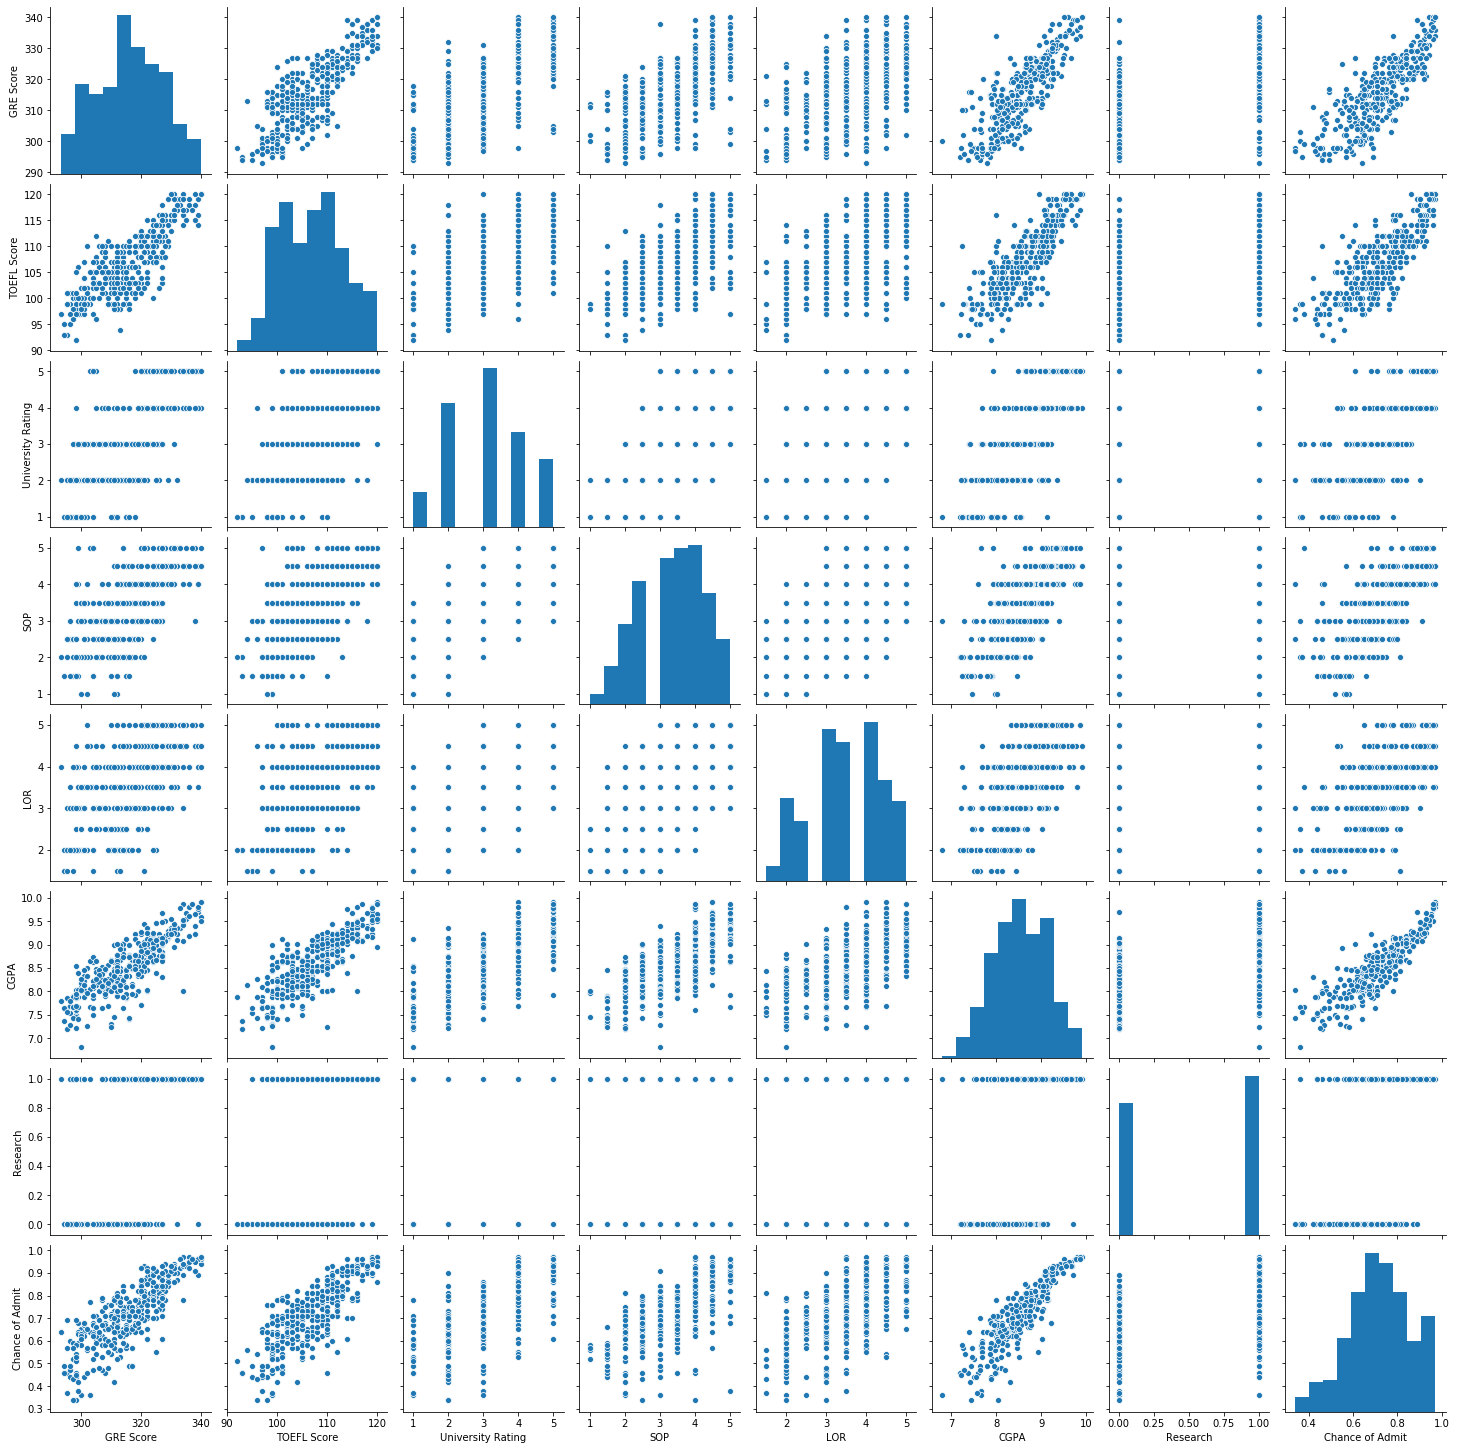

In [9]:
#Visualizing all features

sns.pairplot(train)

In [10]:
train.shape, test.shape

((353, 8), (147, 8))

In [11]:
test.head()

,Id,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0,337,118,4,4.5,4.5,9.65,1
1,2,316,104,3,3.0,3.5,8.00,1
2,6,321,109,3,3.0,4.0,8.20,1
3,8,302,102,1,2.0,1.5,8.00,0
4,9,323,108,3,3.5,3.0,8.60,0


In [12]:
#Checking missing values if any

train.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
train.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.823553,0.644969,0.591456,0.499917,0.824875,0.520244,0.813830
TOEFL Score,0.823553,1.000000,0.644413,0.630838,0.521519,0.803375,0.436825,0.795632
University Rating,0.644969,0.644413,1.000000,0.731481,0.602645,0.703310,0.428536,0.692245
SOP,0.591456,0.630838,0.731481,1.000000,0.640595,0.685949,0.412147,0.654669
LOR,0.499917,0.521519,0.602645,0.640595,1.000000,0.624885,0.366772,0.631490
CGPA,0.824875,0.803375,0.703310,0.685949,0.624885,1.000000,0.469525,0.884564
Research,0.520244,0.436825,0.428536,0.412147,0.366772,0.469525,1.000000,0.519820
Chance of Admit,0.813830,0.795632,0.692245,0.654669,0.631490,0.884564,0.519820,1.000000


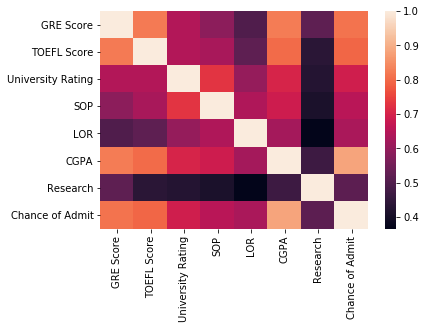

In [14]:
sns.heatmap(train.corr())

In [17]:
#Creating input and output data

X = train.drop('Chance of Admit',axis = 1)
Y = train['Chance of Admit']

In [18]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,324,107,4,4.0,4.5,8.87,1
1,322,110,3,3.5,2.5,8.67,1
2,314,103,2,2.0,3.0,8.21,0
3,330,115,5,4.5,3.0,9.34,1
4,308,101,2,3.0,4.0,7.90,0


In [19]:
Y.head()

0    0.76
1    0.80
2    0.65
3    0.90
4    0.68
Name: Chance of Admit, dtype: float64

In [20]:
#Creating train and test datasets

from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.2, random_state = 12)

In [21]:
lreg = LinearRegression()

In [22]:
#Scaling the input data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
#fit scaler on train data

scaler = scaler.fit(X_train)

In [24]:
X_train_trans = scaler.transform(X_train)

In [25]:
X_val_trans = scaler.transform(X_val)

In [26]:
X_train_trans

array([[0.44680851, 0.33333333, 0.75      , ..., 0.14285714, 0.34615385,
        1.        ],
       [0.44680851, 0.55555556, 0.75      , ..., 0.71428571, 0.71794872,
        1.        ],
       [0.31914894, 0.55555556, 0.5       , ..., 0.57142857, 0.45512821,
        0.        ],
       ...,
       [0.72340426, 0.59259259, 0.5       , ..., 0.71428571, 0.63141026,
        1.        ],
       [0.61702128, 0.7037037 , 0.75      , ..., 0.85714286, 0.78846154,
        1.        ],
       [0.53191489, 0.2962963 , 1.        , ..., 1.        , 0.63461538,
        1.        ]])

In [27]:
#fitting the model on training data

lreg.fit(X_train_trans,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#Making predictions on test data

prediction = lreg.predict(X_val_trans)

In [29]:
prediction

array([0.84725849, 0.79173278, 0.82817035, 0.8229811 , 0.79834248,
       0.61860831, 0.84467284, 0.82730504, 0.6878295 , 0.65005191,
       0.72022664, 0.62390249, 0.87891028, 0.96962627, 0.7410378 ,
       0.81382883, 0.88544718, 0.91488085, 0.50406972, 0.83910772,
       0.63637397, 0.93586216, 0.71545655, 0.96642497, 0.66061708,
       0.62496417, 0.68984615, 0.77669245, 0.47872987, 0.74310212,
       0.94981115, 0.90236203, 0.59139784, 0.95274651, 0.624152  ,
       0.67901259, 0.73570633, 0.86050134, 0.86257382, 0.70882083,
       0.74690969, 0.60444354, 0.76500067, 0.53709711, 0.65797854,
       0.59951446, 0.93843613, 0.79671885, 0.62247407, 0.808546  ,
       0.76765202, 0.51825886, 0.57222537, 0.52033198, 0.68956892,
       0.87961617, 0.75308092, 0.72413576, 0.89376931, 0.60938059,
       0.76747066, 0.6560049 , 0.69852032, 0.83450349, 0.67538606,
       0.5886164 , 0.59306139, 0.47966649, 0.80411103, 0.57258261,
       0.90450762])

In [30]:
len(prediction)

71

In [31]:
Y_val.to_numpy()

array([0.86, 0.77, 0.8 , 0.79, 0.76, 0.58, 0.87, 0.84, 0.64, 0.6 , 0.74,
       0.62, 0.91, 0.96, 0.69, 0.87, 0.89, 0.91, 0.44, 0.79, 0.64, 0.94,
       0.72, 0.96, 0.61, 0.65, 0.71, 0.74, 0.34, 0.8 , 0.94, 0.93, 0.58,
       0.94, 0.59, 0.72, 0.79, 0.88, 0.87, 0.7 , 0.73, 0.68, 0.73, 0.69,
       0.73, 0.71, 0.95, 0.79, 0.47, 0.76, 0.8 , 0.51, 0.58, 0.49, 0.61,
       0.9 , 0.71, 0.76, 0.92, 0.48, 0.76, 0.54, 0.65, 0.84, 0.69, 0.57,
       0.46, 0.45, 0.79, 0.63, 0.86])

In [32]:
#Calculating accuracy

accuracy = lreg.score(X_val_trans,Y_val)

accuracy

0.8676120023004528

In [33]:
#Calculating MSE

from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val,prediction)

0.0028668133737116187

Text(0, 0.5, 'Predictions')

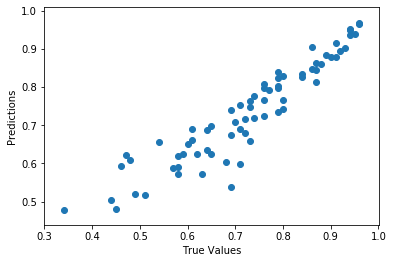

In [34]:
#Plotting scatter plot between predictions and true output values

plt.scatter(Y_val,prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [35]:
Y_val

67     0.86
176    0.77
213    0.80
149    0.79
295    0.76
       ... 
273    0.46
328    0.45
69     0.79
230    0.63
29     0.86
Name: Chance of Admit, Length: 71, dtype: float64

In [36]:
Y_train

293    0.59
48     0.84
87     0.61
111    0.65
7      0.62
       ... 
130    0.71
241    0.81
253    0.79
155    0.91
331    0.78
Name: Chance of Admit, Length: 282, dtype: float64

In [37]:
#Checking the model coefficients

w = np.array(lreg.coef_)
w

array([ 0.09867959,  0.06543717,  0.03282068, -0.02027336,  0.06891531,
        0.3660441 ,  0.01949178])

In [38]:
#Checking intercept

b = np.array(lreg.intercept_)
b

array(0.37870035)

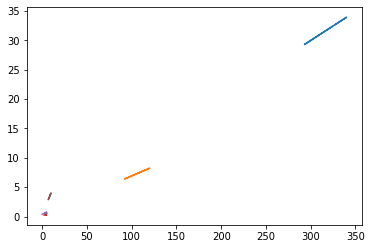

In [39]:
plt.plot(X,(w*X)+b)

In [40]:
#Calculating R square test and train values

print('R sqaure train:{:.3f}'.format(lreg.score(X_train_trans,Y_train)))

print('R sqaure test:{:.3f}'.format(lreg.score(X_val_trans,Y_val)))

R sqaure train:0.814
R sqaure test:0.868


(0.010113963863856584, -2.4752422201127144)

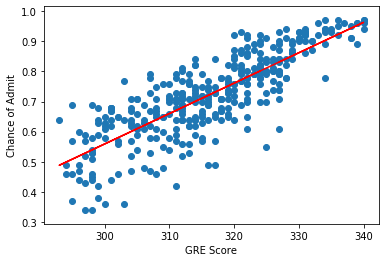

In [340]:
#Plotting graphs between GRE Score and Chance of admit

x0=train['GRE Score']
plt.scatter(x0,Y)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
w0, b0 = np.polyfit(x0,Y,1)
plt.plot(x0, w0*x0 + b0, color = 'red')
w0, b0

(0.01756624375578379, -1.157712388383922)

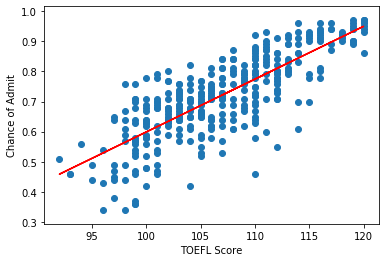

In [341]:
#Plotting graphs between TOEFL Score and Chance of admit

x1 = train['TOEFL Score']
plt.scatter(x1,Y)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
w1, b1 = np.polyfit(x1,Y,1)
plt.plot(x1, w1*x1 + b1, color = 'red')
w1, b1

(0.08301892103588385, 0.4648766338669409)

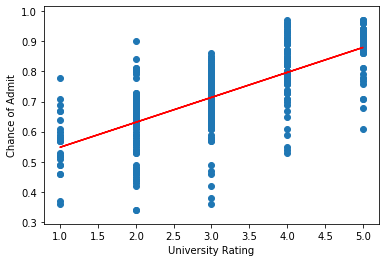

In [342]:
#Plotting graphs between University Rating and Chance of admit

x2 = train['University Rating']
plt.scatter(x2,Y)
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
w2, b2 = np.polyfit(x2,Y,1)
plt.plot(x2, w2*x2 + b2, color = 'red')
w2, b2

(0.09281762474717017, 0.40896298101799)

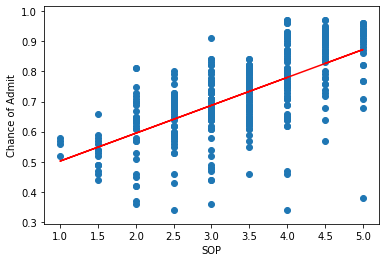

In [343]:
#Plotting graphs between SOP and Chance of admit

x3 = train['SOP']
plt.scatter(x3,Y)
plt.xlabel("SOP")
plt.ylabel("Chance of Admit")
w3, b3 = np.polyfit(x3,Y,1)
plt.plot(x3, w3*x3 + b3, color = 'red')
w3, b3

(0.09424126559968157, 0.38937096682491423)

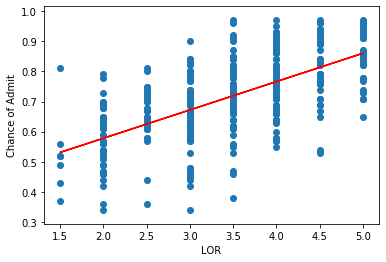

In [344]:
#Plotting graphs between LOR and Chance of admit

x4 = train['LOR']
plt.scatter(x4,Y)
plt.xlabel("LOR")
plt.ylabel("Chance of Admit")
w4, b4 = np.polyfit(x4,Y,1)
plt.plot(x4, w4*x4 + b4, color = 'red')
w4, b4

(0.2046805733322216, -1.0312721697506366)

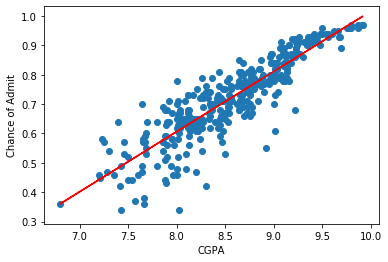

In [345]:
#Plotting graphs between CGPA and Chance of admit

x5 = train['CGPA']
plt.scatter(x5,Y)
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
w5, b5 = np.polyfit(x5, Y,1)
plt.plot(x5, w5*x5 + b5, color = 'red')
w5, b5

(0.14340997409326436, 0.6418750000000001)

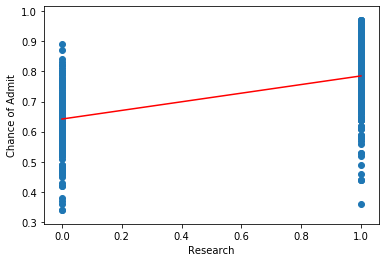

In [346]:
#Plotting graphs between Research and Chance of admit

x6 = train['Research']
plt.scatter(x6,Y)
plt.xlabel("Research")
plt.ylabel("Chance of Admit")
w6, b6 = np.polyfit(x6,Y,1)
plt.plot(x6, w6*x6 + b6, color = 'red')
w6, b6

In [347]:
#finding missing values if any

test.isnull().sum()

Id                   0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64

In [348]:
#Converting test DataFrame into numpy array

test = pd.DataFrame({"A":test['GRE Score'],"B":test['TOEFL Score'],"C":test['University Rating'],"D":test['SOP'],"E":test['LOR'],"F":test['CGPA'],"G":test['Research']})

test.to_numpy()

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       [321.  , 109.  ,   3.  , ...,   4.  ,   8.2 ,   1.  ],
       ...,
       [297.  ,  99.  ,   4.  , ...,   3.5 ,   7.81,   0.  ],
       [300.  ,  95.  ,   2.  , ...,   1.5 ,   8.22,   1.  ],
       [332.  , 108.  ,   5.  , ...,   4.  ,   9.02,   1.  ]])

In [349]:
#Applying transform on test

test_trans = scaler.transform(test)

In [350]:
#Making predictions on test data

pred_y = lreg.predict(test_trans)

In [351]:
pred_y

array([0.9514768 , 0.65958177, 0.715507  , 0.55512668, 0.72249522,
       0.73756466, 0.65128674, 0.73777478, 0.65423013, 0.95913879,
       0.9431093 , 0.96252047, 0.85911661, 0.54964737, 0.58241823,
       0.66010864, 0.88529325, 0.76462113, 0.69094601, 0.64222473,
       0.70029536, 0.75807655, 0.73119919, 0.95532179, 0.96325708,
       0.78352055, 0.65117683, 0.9352455 , 0.66172607, 0.5825469 ,
       0.63267789, 0.93392996, 0.79413902, 0.66722136, 0.5157309 ,
       0.67069323, 0.66947925, 0.68895002, 0.83604254, 0.81664101,
       0.70739301, 0.88844576, 0.68177131, 0.65821116, 0.90823874,
       0.75714652, 0.69793415, 0.83278406, 0.59961168, 0.64185516,
       0.61288921, 0.91115516, 0.88610035, 0.85828345, 0.82535054,
       0.95334883, 0.62412634, 0.64062656, 0.69212812, 0.73663589,
       0.62256323, 0.82775313, 0.67843272, 0.78183085, 0.60866207,
       0.56413924, 0.72467222, 0.85796011, 0.81234933, 0.71303592,
       0.80243315, 0.72815851, 0.80030075, 0.71516338, 0.83889

In [352]:
print(test[:5])

     A    B  C    D    E     F  G
0  337  118  4  4.5  4.5  9.65  1
1  316  104  3  3.0  3.5  8.00  1
2  321  109  3  3.0  4.0  8.20  1
3  302  102  1  2.0  1.5  8.00  0
4  323  108  3  3.5  3.0  8.60  0


In [353]:
print(pred_y[:5])

[0.9514768  0.65958177 0.715507   0.55512668 0.72249522]


In [354]:
#Rounding off predictions

pred_round = np.round(np.array(pred_y),2)

In [355]:
pred_round

array([0.95, 0.66, 0.72, 0.56, 0.72, 0.74, 0.65, 0.74, 0.65, 0.96, 0.94,
       0.96, 0.86, 0.55, 0.58, 0.66, 0.89, 0.76, 0.69, 0.64, 0.7 , 0.76,
       0.73, 0.96, 0.96, 0.78, 0.65, 0.94, 0.66, 0.58, 0.63, 0.93, 0.79,
       0.67, 0.52, 0.67, 0.67, 0.69, 0.84, 0.82, 0.71, 0.89, 0.68, 0.66,
       0.91, 0.76, 0.7 , 0.83, 0.6 , 0.64, 0.61, 0.91, 0.89, 0.86, 0.83,
       0.95, 0.62, 0.64, 0.69, 0.74, 0.62, 0.83, 0.68, 0.78, 0.61, 0.56,
       0.72, 0.86, 0.81, 0.71, 0.8 , 0.73, 0.8 , 0.72, 0.84, 0.69, 0.75,
       0.75, 0.7 , 0.65, 0.54, 0.79, 0.9 , 0.82, 0.79, 0.94, 0.56, 0.65,
       0.67, 0.83, 0.87, 0.6 , 0.74, 0.77, 0.7 , 0.73, 0.73, 0.94, 0.7 ,
       0.78, 0.47, 0.45, 0.7 , 0.91, 0.84, 0.82, 0.58, 0.54, 0.49, 0.53,
       0.84, 0.96, 0.98, 0.71, 0.91, 0.93, 0.58, 0.53, 0.53, 0.74, 0.57,
       0.63, 0.95, 0.89, 0.66, 0.77, 0.62, 0.55, 0.77, 0.86, 0.87, 0.9 ,
       0.55, 0.55, 0.87, 0.61, 0.82, 0.84, 0.64, 0.56, 0.82, 0.73, 0.78,
       0.64, 0.57, 0.58, 0.84])

In [356]:
xtest = pd.read_csv('test.csv')

In [357]:
#Making submission file

submission = pd.DataFrame()

In [358]:
submission['Id'] = xtest['Id']
submission['Chance of Admit'] = pred_round

In [359]:
submission.to_csv('111907011_Chanchal.csv')

Using K-Fold cross validation


In [360]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,324,107,4,4.0,4.5,8.87,1
1,322,110,3,3.5,2.5,8.67,1
2,314,103,2,2.0,3.0,8.21,0
3,330,115,5,4.5,3.0,9.34,1
4,308,101,2,3.0,4.0,7.90,0
...,...,...,...,...,...,...,...
348,301,99,3,2.5,2.0,8.45,1
349,337,117,5,5.0,5.0,9.87,1
350,330,120,5,4.5,5.0,9.56,1
351,312,103,4,4.0,5.0,8.43,0


In [361]:
Y

0      0.76
1      0.80
2      0.65
3      0.90
4      0.68
       ... 
348    0.68
349    0.96
350    0.93
351    0.73
352    0.84
Name: Chance of Admit, Length: 353, dtype: float64

In [362]:
#Using KFold

from sklearn.model_selection import KFold
X1 = np.array(X)
Y1 = np.array(Y)
kf = KFold(n_splits = 6)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=6, random_state=None, shuffle=False)


In [363]:
#Splitting train data into 6 parts, one of which is considered for testing

for train_index, test_index in kf.split(X1):
    print("Train1:",train_index, "Test1:", test_index)
    X1_train,X1_test = X1[train_index], X1[test_index]
    Y1_train,Y1_test = Y1[train_index], Y1[test_index]

Train1: [ 59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 30

In [364]:
Y1_test.shape

(58,)

In [365]:
X1_test.shape

(58, 7)

In [366]:
Y1_train.shape


(295,)

In [367]:
X1_train.shape

(295, 7)

In [368]:
#Calculating score using cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lreg, X1_train, Y1_train, cv = 6)

scores

array([0.69410988, 0.80164004, 0.82201553, 0.86584087, 0.80192688,
       0.76283694])

In [369]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.791 (0.053)


In [370]:
#Making prediction using cross validation

from sklearn.model_selection import cross_val_predict
Y_pred = cross_val_predict(lreg, X1_test, Y1_test, cv=kf)

In [371]:
pred = np.round(np.array(Y_pred),2)
pred

array([0.81, 0.66, 0.62, 0.51, 0.81, 0.83, 0.96, 0.91, 0.69, 0.72, 0.69,
       0.87, 0.73, 0.64, 0.56, 0.52, 0.72, 0.64, 0.92, 0.87, 0.87, 0.94,
       0.79, 0.72, 0.75, 0.79, 0.74, 0.61, 0.49, 0.69, 0.78, 0.61, 0.59,
       0.46, 0.65, 0.76, 0.79, 0.85, 0.62, 0.9 , 0.61, 0.58, 0.61, 0.73,
       0.79, 0.59, 0.66, 0.65, 0.83, 0.76, 0.7 , 0.65, 0.59, 0.65, 1.  ,
       0.96, 0.7 , 0.83])

In [372]:
Y1_test

array([0.76, 0.65, 0.6 , 0.42, 0.77, 0.73, 0.94, 0.91, 0.71, 0.71, 0.69,
       0.86, 0.71, 0.64, 0.55, 0.58, 0.67, 0.66, 0.92, 0.92, 0.91, 0.93,
       0.84, 0.8 , 0.79, 0.82, 0.73, 0.71, 0.37, 0.69, 0.77, 0.68, 0.57,
       0.45, 0.54, 0.71, 0.78, 0.87, 0.64, 0.9 , 0.67, 0.62, 0.65, 0.71,
       0.8 , 0.71, 0.7 , 0.68, 0.79, 0.76, 0.65, 0.67, 0.53, 0.68, 0.96,
       0.93, 0.73, 0.84])

In [373]:
#Calculating MSE

mean_squared_error(Y1_test,pred)

0.0022155172413793104